In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

import repository as repo

In [2]:
base_repo = "https://api.github.com/users/{user}/repos" 

In [3]:
columns = [
 'name',
 'fork',
 'created_at',
 'updated_at',
 'pushed_at',
 'size',
 'stargazers_count',
 'watchers_count',
 'language',
 'has_issues',
 'has_projects',
 'has_downloads',
 'has_wiki',
 'has_pages',
 'forks_count',
 'archived',
 'disabled',
 'open_issues_count',
 'forks',
 'open_issues',
 'watchers',
 'default_branch'
]

In [11]:
user = "ViniciusAugusto20"

# Repositories

In [13]:
df = repo.getRepos(user)
df

,name,fork,created_at,updated_at,pushed_at,size,stargazers_count,watchers_count,language,has_issues,...,has_pages,forks_count,archived,disabled,open_issues_count,forks,open_issues,watchers,default_branch,year
0,Cards_Filmes,False,2019-03-25 02:23:33+00:00,2019-03-25 03:47:10+00:00,2019-03-25 03:47:08+00:00,2228,0,0,PHP,True,...,False,0,False,False,0,0,0,0,master,2019
1,iTop-Kanban-Module,False,2018-10-19 15:27:27+00:00,2020-04-12 15:29:23+00:00,2018-12-14 12:44:09+00:00,223,0,0,CSS,True,...,False,0,False,False,3,0,3,0,master,2018
2,NodeJS-Finances,False,2020-04-22 01:50:25+00:00,2020-04-22 01:50:31+00:00,2020-11-25 04:29:26+00:00,319,0,0,TypeScript,True,...,False,0,False,False,2,0,2,0,master,2020
3,NodeJS-Simple-Finance-Control,False,2020-04-21 17:18:20+00:00,2020-04-22 01:47:45+00:00,2020-07-20 10:00:34+00:00,231,0,0,JavaScript,True,...,False,0,False,False,1,0,1,0,master,2020
4,Node_and_TypeORM,False,2020-05-23 11:57:48+00:00,2020-05-23 11:57:53+00:00,2020-11-25 05:11:05+00:00,319,0,0,TypeScript,True,...,False,0,False,False,2,0,2,0,master,2020
5,Questoes_Talk,False,2020-07-27 13:43:23+00:00,2020-07-27 14:10:18+00:00,2020-07-27 14:07:09+00:00,806,0,0,TypeScript,True,...,False,0,False,False,0,0,0,0,master,2020
6,rick-and-morty-cards,False,2020-10-25 04:03:28+00:00,2020-10-26 02:37:14+00:00,2020-10-26 02:33:45+00:00,5478,0,0,TypeScript,True,...,False,0,False,False,0,0,0,0,main,2020
7,Simple-List-Using-ReactJS,False,2020-04-12 15:31:12+00:00,2020-04-12 22:03:16+00:00,2020-09-11 17:23:10+00:00,779,0,0,JavaScript,True,...,False,0,False,False,3,0,3,0,master,2020
8,Simple-NodeJS-Api,False,2020-04-12 14:51:27+00:00,2020-05-01 12:49:45+00:00,2020-12-12 13:51:32+00:00,235,0,0,JavaScript,True,...,False,0,False,False,2,0,2,0,master,2020
9,Simple-ReactNative-Listing,False,2020-04-12 22:04:53+00:00,2020-04-14 20:15:34+00:00,2021-01-06 00:17:10+00:00,532,0,0,JavaScript,True,...,False,0,False,False,2,0,2,0,master,2020


## Languages

In [16]:
df1 = repo.creationFromYear(df)

<AxesSubplot:title={'center':'Criação de Repositórios por Linguagem e por Ano'}, xlabel='year'>

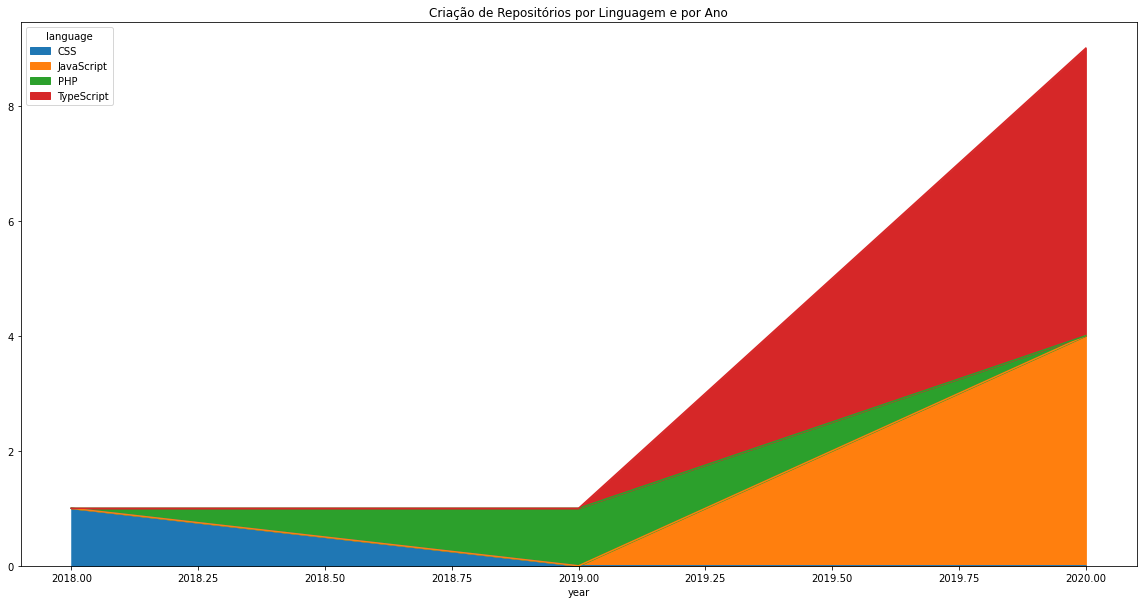

In [17]:
df1.plot(kind="area", figsize=(20,10), title="Criação de Repositórios por Linguagem e por Ano")

## Quantidade de Código

In [18]:
languages = df[["language", "year", "size"]]
lg1 = languages.groupby(["language", "year"])["size"].sum().reset_index(name="size")

df2 = lg1.pivot(index='year', columns='language', values='size')
df2 = df2.fillna(0)

df2

language,CSS,JavaScript,PHP,TypeScript
year,,,,
2018,223.0,0.0,0.0,0.0
2019,0.0,0.0,2228.0,0.0
2020,0.0,1777.0,0.0,7372.0


<AxesSubplot:title={'center':'Criação de Código por Linguagem por Ano'}, xlabel='year'>

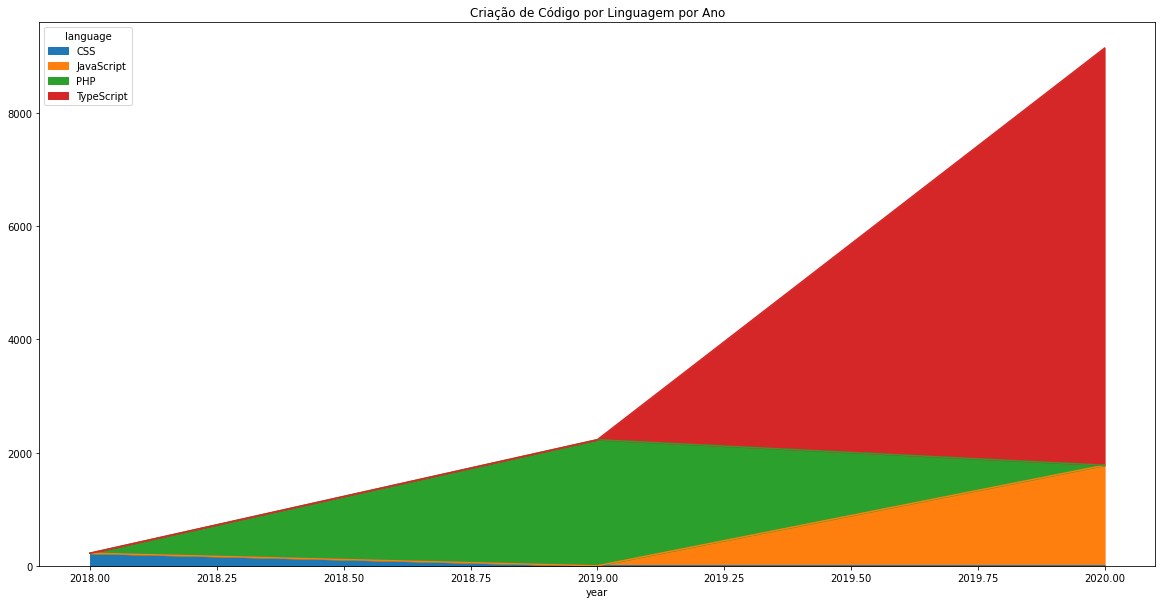

In [19]:
df2.plot(kind="area", figsize=(20,10), title="Criação de Código por Linguagem por Ano")